<a href="https://colab.research.google.com/github/qreynas/sentiment_analysis/blob/main/01_Sentiment_Analysis_BCXP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🎯 Problema de Negocio
Enrique I. Reyna S.

Bootcap Xperience. El objetivo de este proyecto es analizar los sentimientos de los tweets, identificando si los mensajes son positivos o negativos.

## ❓ Preguntas Clave

- **¿Qué variables pueden ser clave para la detección del sentimiento?**
- **¿Qué tipo de modelos pueden servir para detectar el sentimiento en los tweets?**
- **¿Qué métricas se pueden utilizar para evaluar el desempeño del modelo?**

Este ejercicio esta basado en Sentiment140 Dataset. Es un un conjunto de datos de 1,600,000 tweets preprocesados, del cual se pretende generar diversas características que se utilizarán para entrenar un modelo de clasificación.

El conjunto de datos es una colección de 1,6 millones de tuits que **han sido etiquetados como positivos o negativos**.


*Pregunta de trabajo: ¿cómo consiguieron tantos tuits etiquetados?.* Documentación https://www.kaggle.com/datasets/kazanova/sentiment140

**Hipótesis de trabajo: asumimos que cualquier tuit con emoticones positivos, como :), era positivo, y los tuits con emoticones negativos, como :(, eran negativos.**

**Es bueno discutir eso más adelante, pero por ahora, simplemente limpiemos el asunto. En este cuaderno, eliminaremos las columnas que no queremos y estandarizaremos la columna de sentimiento.**



#Prep work

In [1]:
import pandas as pd

In [2]:
#Get data. Conect to google drive
df = pd.read_csv('/content/drive/MyDrive/2025/02 BCXP ML/01 Análisis de sentimientos/training_1600000_processed_noemoticon.csv', encoding='latin-1')

In [3]:
df.head(3)

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire


In [4]:
df.sample(5)

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
850277,4,1565396779,Mon Apr 20 06:39:28 PDT 2009,NO_QUERY,scheske,@ericapaige83 We have such good taste in twitt...
203376,0,1972348449,Sat May 30 09:03:25 PDT 2009,NO_QUERY,clarasdiary,@MarshMash nor is it on mine ARGH!!! I dunno w...
568995,0,2207758745,Wed Jun 17 08:20:47 PDT 2009,NO_QUERY,liecharmgalx,crying for my destiny
1519167,4,2176046304,Mon Jun 15 02:45:25 PDT 2009,NO_QUERY,rod76,hola los twitos. how did monday come around so...
1394667,4,2053642125,Sat Jun 06 05:14:38 PDT 2009,NO_QUERY,Speed2007,@mayluv1983 goodmorning


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column                                                                                                               Non-Null Count    Dtype 
---  ------                                                                                                               --------------    ----- 
 0   0                                                                                                                    1599999 non-null  int64 
 1   1467810369                                                                                                           1599999 non-null  int64 
 2   Mon Apr 06 22:19:45 PDT 2009                                                                                         1599999 non-null  object
 3   NO_QUERY                                                                                                             1599999 non-null  object
 4   _

 ·The tweets have been annotated (0 = negative, 2 = neutral, 4 = positive) and they can be used to detect sentiment .
It contains the following 6 fields:

  1.**target:** the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)

  2.**ids:** The id of the tweet ( 2087)

  3.**date:** the date of the tweet (Sat May 16 23:58:44 UTC 2009)

  4.**flag:** The query (lyx). If there is no query, then this
value is NO_QUERY.

  5.**user:** the user that tweeted (robotickilldozr)

In [6]:
df.columns = ['target', 'ids', 'date', 'flag', 'user', 'text']
df

,target,ids,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [7]:
#También puede renombrar las columnas de la siguiente forma en el mismo getdata
df = pd.read_csv('/content/drive/MyDrive/2025/02 BCXP ML/01 Análisis de sentimientos/training_1600000_processed_noemoticon.csv', encoding='latin-1',
                names=['polarity', 'id', 'date', 'query', 'user', 'text'])
df.head(3)

,polarity,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...



### Tratamiento de Datos

Durante el preprocesamiento se realizan las siguientes operaciones clave:

- 🧹 **Eliminación de URLs, menciones y emojis**: Se remueven del texto ya que pueden agregar ruido al análisis.
- ❌ **Eliminación de signos de puntuación y caracteres especiales**: Para normalizar el texto antes de aplicar las transformaciones.
- 🔡 **Transformación a minúsculas**: Para evitar que las palabras en mayúsculas se traten como diferentes palabras.
- 🛠️ **Generación de características adicionales**: Se generan nuevas variables basadas en el texto, como longitud del tweet, conteo de stopwords, densidad de palabras en mayúsculas, entre otras.


In [8]:
# counting missing values in dataset. Conteo de valores nulos
df.isnull().sum()


,0
polarity,0
id,0
date,0
query,0
user,0
text,0


In [9]:
#Crear sample
df_nuevo = df.sample(n=10, random_state=42).reset_index(drop=True)
df_nuevo

,polarity,id,date,query,user,text
0,0,2200003196,Tue Jun 16 18:18:12 PDT 2009,NO_QUERY,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!
1,0,1467998485,Mon Apr 06 23:11:14 PDT 2009,NO_QUERY,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo..."
2,0,2300048954,Tue Jun 23 13:40:11 PDT 2009,NO_QUERY,sammydearr,@TiannaChaos i know just family drama. its la...
3,0,1993474027,Mon Jun 01 10:26:07 PDT 2009,NO_QUERY,Lamb_Leanne,School email won't open and I have geography ...
4,0,2256550904,Sat Jun 20 12:56:51 PDT 2009,NO_QUERY,yogicerdito,upper airways problem
5,0,2052380495,Sat Jun 06 00:32:16 PDT 2009,NO_QUERY,Yengching,Going to miss Pastor's sermon on Faith...
6,4,1983449090,Sun May 31 13:10:36 PDT 2009,NO_QUERY,jessig06,on lunch....dj should come eat with me
7,0,2245479748,Fri Jun 19 16:11:29 PDT 2009,NO_QUERY,felicityfuller,@piginthepoke oh why are you feeling like that?
8,0,1770705699,Mon May 11 22:01:32 PDT 2009,NO_QUERY,stephiiheyy,gahh noo!peyton needs to live!this is horrible
9,4,1970386589,Sat May 30 03:39:34 PDT 2009,NO_QUERY,wyndwitch,@mrstessyman thank you glad you like it! There...


In [10]:
from google.colab import files

df_nuevo.to_csv('nuevo_dataset.csv', index=False)
files.download('nuevo_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Limpieza de datos

In [11]:
!pip install nltk

In [12]:
import pandas as pd
import re
import string
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [13]:
# Función para limpiar el texto
def clean_text(text):
    # Convertir a minúsculas
    text = str(text).lower()

    # Eliminar URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # Eliminar menciones (@usuario)
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)

    # Eliminar signos de puntuación
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Eliminar números
    text = re.sub(r'\d+', '', text)

    # Eliminar espacios múltiples
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Aplicar la limpieza al texto
df['clean_text'] = df['text'].apply(clean_text)

In [14]:
df.sample(5)

,polarity,id,date,query,user,text,clean_text
161231,0,1957247634,Thu May 28 23:56:37 PDT 2009,NO_QUERY,Samm_xo,@jesssicababesss @IvanaE @RachelLock22 DECEMBE...,december thats like a year away
982209,4,1834182971,Mon May 18 01:57:04 PDT 2009,NO_QUERY,ohheyitsbrianne,@secondhandjohn Thank you for following!,thank you for following
1193981,4,1984362717,Sun May 31 14:57:41 PDT 2009,NO_QUERY,elliscrawshaw,goood day - new clothes xx,goood day new clothes xx
3738,0,1468663535,Tue Apr 07 03:01:56 PDT 2009,NO_QUERY,smartestgames,Someone somewhere didn't like Sheepish http://...,someone somewhere didnt like sheepish
322351,0,2004330395,Tue Jun 02 08:02:05 PDT 2009,NO_QUERY,LaTtEX,"@philiplaureano Unfortunately, I don't. I don...",unfortunately i dont i dont think any such sur...


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   polarity    1600000 non-null  int64 
 1   id          1600000 non-null  int64 
 2   date        1600000 non-null  object
 3   query       1600000 non-null  object
 4   user        1600000 non-null  object
 5   text        1600000 non-null  object
 6   clean_text  1600000 non-null  object
dtypes: int64(2), object(5)
memory usage: 85.4+ MB


In [16]:
#Este es otro codigo para limpiar texto pero NO ESTA ADECUADO NI PROBRADO
#https://www.kaggle.com/code/youssefhatem1/twitter-sentiment-analysis-using-cnn-architectures
# Define English stopwords
en_stop = set(stopwords.words('english'))

# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()
# Define function to clean and preprocess text
def process_text(document):
    document = re.sub(r'\s+', ' ', document, flags=re.I)  # Remove extra white space from text
    document = re.sub(r'\W', ' ', str(document))   # Remove all the special characters from text
    document = re.sub(r'[^a-zA-Z\s]', '', document) # Remove any character that isn't alphabetical
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)     # Remove all single characters from text
    document = document.lower()    # Converting to Lowercase
    # Word tokenization
    tokens = document.split()
    lemma_txt = [lemmatizer.lemmatize(word) for word in tokens]
    lemma_no_stop_txt = [word for word in lemma_txt if word not in en_stop]
    # Drop words
    tokens = [word for word in lemma_no_stop_txt if len(word) > 3 and not word.isdigit()]
    # Getting unique words
    indices = np.unique(tokens, return_index=True)[1]
    clean_txt = np.array(tokens)[np.sort(indices)].tolist()
    return ' '.join(clean_txt)  # Return the cleaned text as a string

NameError: name 'WordNetLemmatizer' is not defined

In [17]:
# Generar características adicionales
df['tweet_length'] = df['text'].str.len()
df['word_count'] = df['clean_text'].str.split().str.len()
df['uppercase_ratio'] = df['text'].apply(lambda x: sum(1 for c in str(x) if c.isupper()) / len(str(x)) if len(str(x)) > 0 else 0)

# Contar stopwords
stop_words = set(stopwords.words('english'))
df['stopwords_count'] = df['clean_text'].apply(lambda x: len([word for word in str(x).split() if word in stop_words]))

# Mostrar el resultado
print(df[['text', 'clean_text', 'tweet_length', 'word_count', 'uppercase_ratio', 'stopwords_count']].head())

# Guardar el dataset procesado
df.to_csv('cleaned_dataset.csv', index=False)

                                                text  \
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1  is upset that he can't update his Facebook by ...   
2  @Kenichan I dived many times for the ball. Man...   
3    my whole body feels itchy and like its on fire    
4  @nationwideclass no, it's not behaving at all....   

                                          clean_text  tweet_length  \
0  a thats a bummer you shoulda got david carr of...           115   
1  is upset that he cant update his facebook by t...           111   
2  i dived many times for the ball managed to sav...            89   
3     my whole body feels itchy and like its on fire            47   
4  no its not behaving at all im mad why am i her...           111   

   word_count  uppercase_ratio  stopwords_count  
0          16         0.060870                8  
1          21         0.027027                9  
2          16         0.044944                7  
3          10         0.000000            

In [18]:
#Contar stopwords
stop_words = set(stopwords.words('english'))
df['stopwords_count'] = df['clean_text'].apply(lambda x: len([word for word in str(x).split() if word in stop_words]))

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 11 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   polarity         1600000 non-null  int64  
 1   id               1600000 non-null  int64  
 2   date             1600000 non-null  object 
 3   query            1600000 non-null  object 
 4   user             1600000 non-null  object 
 5   text             1600000 non-null  object 
 6   clean_text       1600000 non-null  object 
 7   tweet_length     1600000 non-null  int64  
 8   word_count       1600000 non-null  int64  
 9   uppercase_ratio  1600000 non-null  float64
 10  stopwords_count  1600000 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 134.3+ MB


In [20]:
#Revisamos el resultados
print(df[['text', 'clean_text', 'tweet_length', 'word_count', 'uppercase_ratio', 'stopwords_count']].head(3))

                                                text  \
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1  is upset that he can't update his Facebook by ...   
2  @Kenichan I dived many times for the ball. Man...   

                                          clean_text  tweet_length  \
0  a thats a bummer you shoulda got david carr of...           115   
1  is upset that he cant update his facebook by t...           111   
2  i dived many times for the ball managed to sav...            89   

   word_count  uppercase_ratio  stopwords_count  
0          16         0.060870                8  
1          21         0.027027                9  
2          16         0.044944                7  


In [21]:
df

,polarity,id,date,query,user,text,clean_text,tweet_length,word_count,uppercase_ratio,stopwords_count
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",a thats a bummer you shoulda got david carr of...,115,16,0.060870,8
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...,111,21,0.027027,9
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sav...,89,16,0.044944,7
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,47,10,0.000000,4
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i her...,111,20,0.009009,15
...,...,...,...,...,...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,just woke up having no school is the best feel...,56,11,0.035714,6
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,thewdbcom very cool to hear old walt interview...,78,9,0.076923,2
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,are you ready for your mojo makeover ask me fo...,57,11,0.087719,6
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,happy th birthday to my boo of alll time tupac...,65,12,0.076923,3


In [22]:
# Descaragr el dataset limpio para pruebas externas
# df.to_csv('cleaned_dataset.csv', index=False)
# from google.colab import files
# files.download('cleaned_dataset.csv')

In [30]:
# Crear un sample del dataset lipio de 400,000 registros para pruebas
# df_sample_cleaned = df.sample(n=400000, random_state=42).reset_index(drop=True)
# df_sample_cleaned.to_csv('sample_cleaned_dataset.csv', index=False)
# files.download('sample_cleaned_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
# df_sample_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   polarity         10 non-null     int64  
 1   id               10 non-null     int64  
 2   date             10 non-null     object 
 3   query            10 non-null     object 
 4   user             10 non-null     object 
 5   text             10 non-null     object 
 6   clean_text       10 non-null     object 
 7   tweet_length     10 non-null     int64  
 8   word_count       10 non-null     int64  
 9   uppercase_ratio  10 non-null     float64
 10  stopwords_count  10 non-null     int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 1012.0+ bytes


#SEGUNDO EJERCICIO DE EDA

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import re

In [33]:
# Descargar stopwords de NLTK
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 1.Carga de datos

In [35]:
# 1.GET DATA. Conect to google drive
df = pd.read_csv('/content/drive/MyDrive/2025/02 BCXP ML/01 Análisis de sentimientos/training_1600000_processed_noemoticon.csv', encoding='latin-1')

## 2.Análisis exploratorio de datos (EDA):

In [38]:
# Análisis exploratorio de datos (EDA)
print(df.head())
print('********'*20)
print(df.info())
print('********'*20)
print(df.describe())

   0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY _TheSpecialOne_  \
0  0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   scotthamilton   
1  0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY        mattycus   
2  0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY         ElleCTF   
3  0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          Karoli   
4  0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY        joy_wolf   

  @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D  
0  is upset that he can't update his Facebook by ...                                                                   
1  @Kenichan I dived many times for the ball. Man...                                                                   
2    my whole body feels itchy and like its on fire                                                                    
3  @nationwideclass no, it's not behaving at all....           

The tweets have been annotated (0 = negative, 2 = neutral, 4 = positive) and they can be used to detect sentiment . It contains the following 6 fields:

1.target: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)

2.ids: The id of the tweet ( 2087)

3.date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)

4.flag: The query (lyx). If there is no query, then this value is NO_QUERY.

5.user: the user that tweeted (robotickilldozr)

In [41]:
#Colocamos nombre a las columnas
df.columns = ['target', 'ids', 'date', 'flag', 'user', 'text']
df

,target,ids,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [42]:
#Reiniciamos indices (por salud mental e higiene en ciencia de datos)
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1599999 non-null  int64 
 1   ids     1599999 non-null  int64 
 2   date    1599999 non-null  object
 3   flag    1599999 non-null  object
 4   user    1599999 non-null  object
 5   text    1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [45]:
df.info('target')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1599999 non-null  int64 
 1   ids     1599999 non-null  int64 
 2   date    1599999 non-null  object
 3   flag    1599999 non-null  object
 4   user    1599999 non-null  object
 5   text    1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


#3.Preprocesamiento de sentimientos

In [ ]:
# Distribución de polaridad
plt.figure(figsize=(8, 6))
sns.countplot(x='polarity', data=df)
plt.title('Distribución de Polaridad')
plt.show()

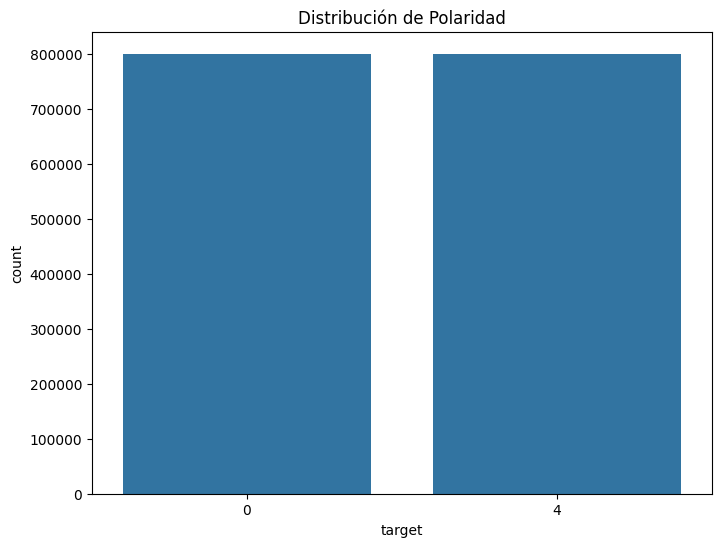

In [44]:
# Distribución de polaridad (usando 'target')
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df) # Changed 'polarity' to 'target'
plt.title('Distribución de Polaridad')
plt.show()

##4.Análisis de sentimientos

##5.Entrenamiento de Modelos

##6.Evaluación de modelo

##7.Visualización del modelo